a= 0.000316530754396266 +- 8.457136664326452e-06
Grenfrequenz= 3159.250676628081 +- 84.40953796123353


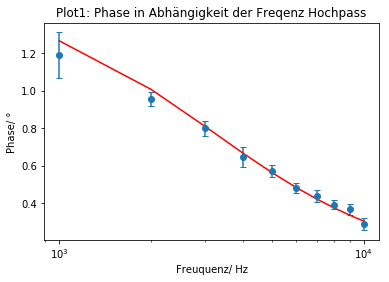

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.optimize import curve_fit

x = np.linspace(1,10,10)*1000
y = np.array([68,54.7,45.8,37,32.8,27.6,25.2,22.5,21.1,16.6])*np.pi/180
yerr= np.array([7,2.2,2.2,3,1.8,1.5,1.8,1.4,1.6,1.8])*np.pi/180

plt.errorbar(x, y,yerr, fmt="o",capsize=3)

def fit_func(x,a):
    return np.arctan(1/(a*x))

popt,pcov=curve_fit(fit_func,x,y,sigma=yerr,absolute_sigma=True)

a=popt[0]
aerr=np.sqrt(pcov[0][0])
print("a=", a, "+-", aerr)

plt.plot(x,fit_func(x,a),'r')

#Frequenz bei Phase 45° = Grenzfrequenz 
f_gr=1/a/np.tan(45*np.pi/180)
f_gr_err=aerr/a**2/np.tan(45*np.pi/180)
print("Grenfrequenz=",f_gr,"+-",f_gr_err)

plt.xscale('log')
plt.title('Plot1: Phase in Abhängigkeit der Freqenz Hochpass')
plt.xlabel('Freuquenz/ Hz')
plt.ylabel ('Phase/ °')
plt.savefig("Plot1.pdf",format="pdf")